#  Principal Component Analysis
## This notebook outlines the applications of the Principal Components Analysis Machine Learning Algorithm

PCA is fundamentally a dimensionality reduction algorithm.
- visualization tool
- noise filtering
- feature extraction

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Eigenfaces

Labeled Faces in the Wild dataset

This task is to apply PCA to reduce dimensions and still reconstruct the original image from the reduced set of features
- Fetch the LFW dataset
- Build a PCA model with reduced components (you can play around with different numbers)
- Transform the data with the trained model
- Visualize the eigen vectors (eigenfaces)
- Reconstruct the original image from the reduced eigenfaces
- Experiment with different number of principal components

### Fetch the LFW dataset

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


- Dataset has 3000 dimensional features

Let us use PCA to reduce the dimensions

### Import the PCA estimator

In [7]:
from sklearn.decomposition import PCA as RandomizedPCA

### Create the Estimator object with 150 principal components

In [10]:
pca = RandomizedPCA(150)

### Fit the model

In [13]:
pca.fit(faces.data)

PCA(n_components=150)

### Visualize the principal components (eigenfaces)

First several principal components are technically known as **eigenvectors**, so these types of images are often called **eigenfaces**

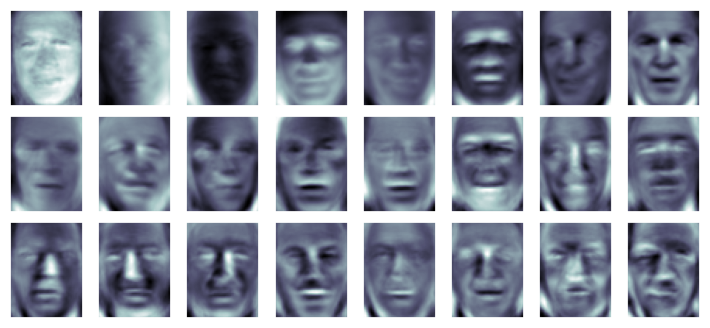

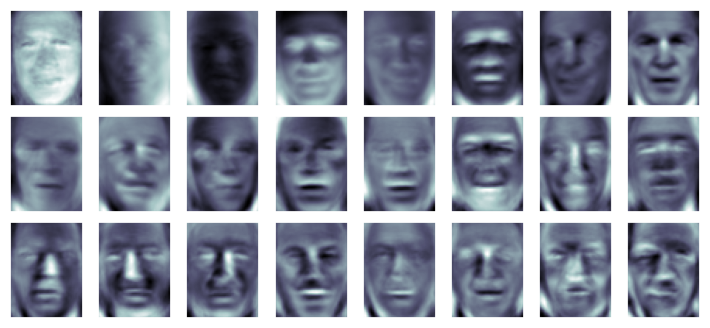

In [25]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')


plt.show()

### Plot the Cumulative Explained variance over number of principal components

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.
Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

In [29]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Observations
- **150 components** account for just over **90% of the variance**

That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.

#### Task
- Reconstruct the images with these 150 components
- Compare it against the original images

### Fit the model on the LFW faces dataset

In [33]:
pca = RandomizedPCA(150).fit(faces.data)

In [35]:
#RandomizedPCA 是 scikit-learn 提供的一種隨機近似 PCA 方法，適合高維數據的快速降維，特別是像人臉數據這類高維圖像數據。

#相比於標準 PCA，RandomizedPCA 具有：

#運算速度更快：對於高維數據（如 10000 維以上），計算主成分的時間大幅降低。
#內存消耗較少：標準 PCA 需要計算整個特徵協方差矩陣，而 RandomizedPCA 透過隨機投影（random projections）來近似計算，減少內存使用。
#結果近似於標準 PCA，但在某些情況下可能會略有誤差。

### Transform and collect the components

In [38]:
components = pca.transform(faces.data)

### Do the inverse transform to get the projections

In [41]:
projected = pca.inverse_transform(components)

### Plot the results

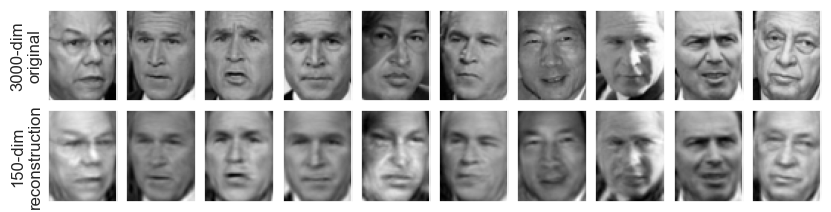

In [47]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('3000-dim\noriginal')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

plt.show()

### Observations???

- Top row here shows the input images
- Boottom row shows the reconstruction of the images from just 150 of the 3,000 initial features

- It reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image.

#### Takeaway
Train a classification algorithm on 150-dimensional data which explains 90% of variance in the data rather than using 3,000-dimensional data

### Write a python function that takes in n_components as input and outputs the reconstructed images from the given number of components

In [49]:
def reconstruct_images(n_components):
    pca = RandomizedPCA(n_components).fit(faces.data)
    components = pca.transform(faces.data)
    projections = pca.inverse_transform(components)
    return projections

In [51]:
def plot_projections(projections, n):
    fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i in range(10):
        ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
        ax[1, i].imshow(projections[i].reshape(62, 47), cmap='binary_r')

    ax[0, 0].set_ylabel('3000-dim\noriginal')
    ax[1, 0].set_ylabel(f'{n}-dim\nreconstruction');

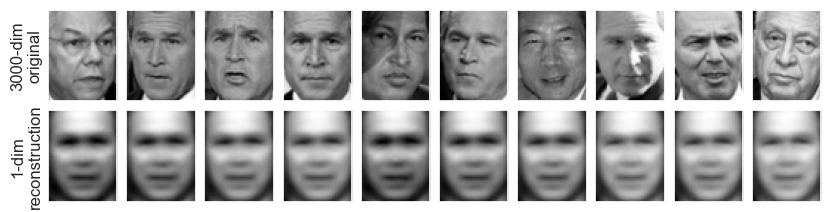

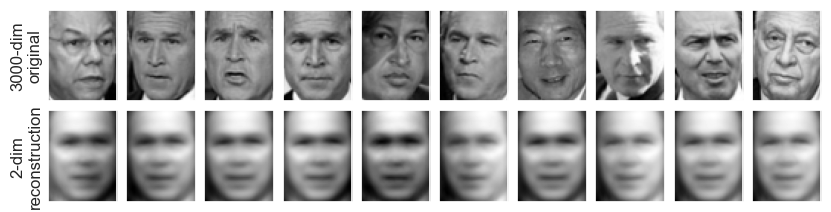

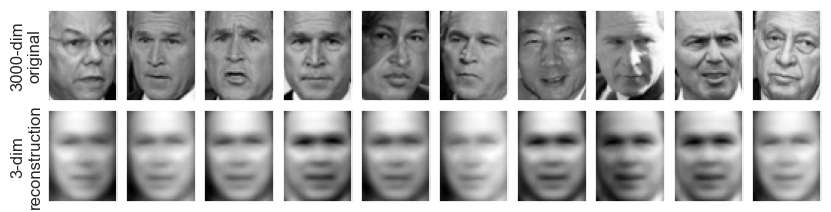

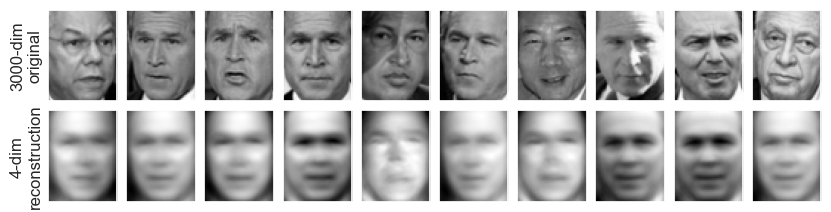

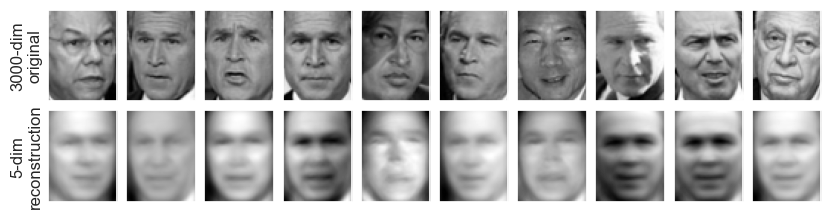

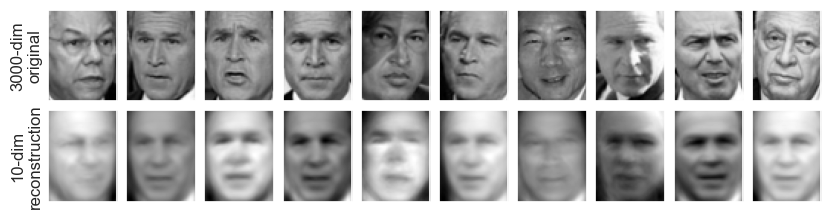

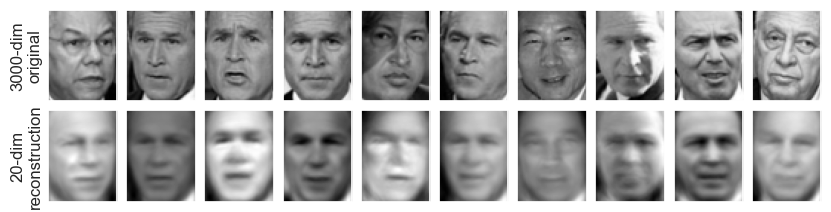

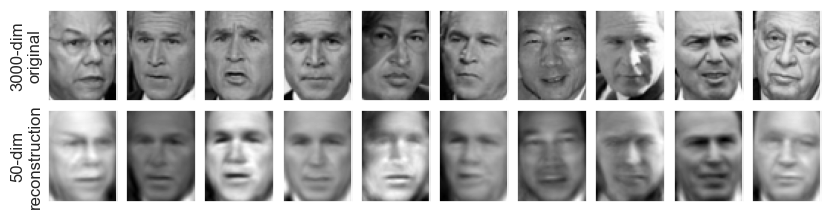

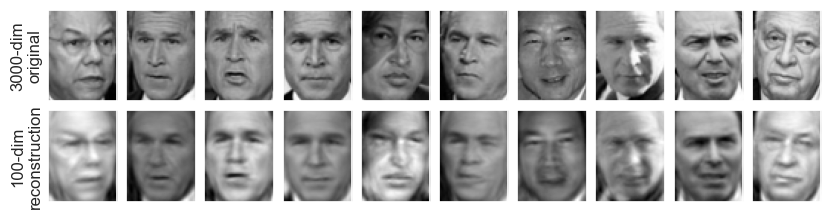

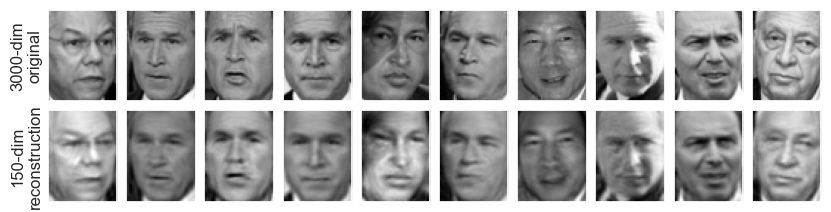

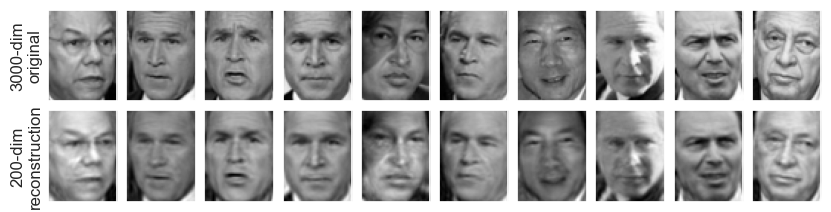

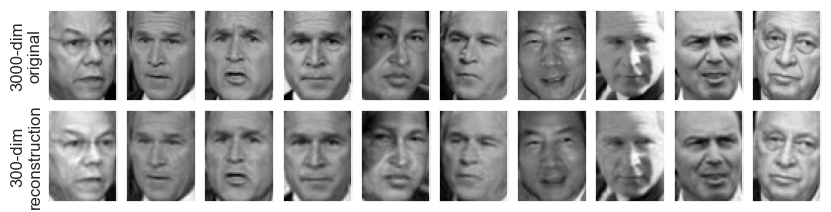

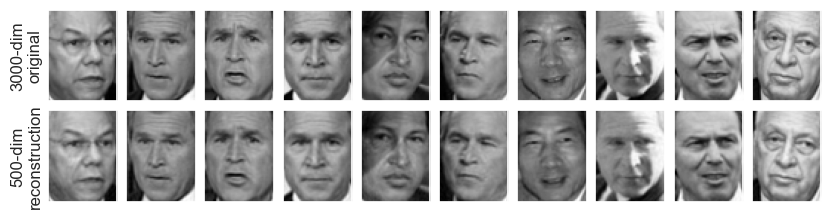

In [56]:
components = [1, 2, 3, 4, 5, 10, 20, 50, 100, 150, 200, 300, 500]
for n in components:
    projections = reconstruct_images(n)
    plot_projections(projections, n)

plt.show()